In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2



def bgr2rgb(img_bgr):
    img_rgb = np.zeros(img_bgr.shape, img_bgr.dtype)
    img_rgb[:,:,0] = img_bgr[:,:,2]
    img_rgb[:,:,1] = img_bgr[:,:,1]
    img_rgb[:,:,2] = img_bgr[:,:,0]
    return img_rgb


In [19]:
def find_k_features(photo,k):
    """
    k-mean ++, input is an array
    """
    l = photo.shape[0]
    k_feature = photo[np.random.choice(l,1)]
    fixed_norm = np.sum(np.square(photo),axis=1,keepdims=True)  # N x 3
    for i in range(k-1):
        k_square_sum = np.sum(np.square(k_feature),axis=1,keepdims=False) # M x 3
        distance = ((fixed_norm + k_square_sum).T - 2*np.dot(k_feature,np.transpose(photo))) # M x N
        P = np.cumsum(np.min(distance,axis=0)/np.sum(np.min(distance,axis=0)))
        seed = np.random.random()
        new_k = photo[P>seed][0]
        k_feature = np.vstack((k_feature,new_k))
    return k_feature

In [20]:

def k_mean(photo, k, plus =True):
    """
    k-means algorithm, plus is optional
    """
    if (plus == True):
        # Use the function to find best k_features
        # k means++: Find the k longest point
        k_feature = find_k_features(photo,k)
    else: 
        # find the feature pixel vector RANDOMLY.
        k_feature = photo[np.random.choice(photo.shape[0],k,replace=False)]
        
    last_loss = 0
    fixed_norm = np.sum(np.square(photo),axis=1,keepdims=True)  # N x 3
    # while k center still changing
    for i in range(1000):
        k_square_sum = np.sum(np.square(k_feature),axis=1,keepdims=False) # M x 3
        distance = ((fixed_norm + k_square_sum).T- 2*np.dot(k_feature,np.transpose(photo))) # M x N
        
        ############################################################
        #   Vectorize progress, aspired from CS231n assignment 1 KNN Part.
        #   , makes this faster! =)
        ##########################################################
        min_loss = np.sum(np.min(distance,axis=0))
        if (abs(last_loss-min_loss) /min_loss < 0.01):
            # check if we converge.
            break
            
        last_loss = min_loss
        min_index = np.argmin(distance,axis = 0)

        # update each k feature to average.
        for i in range(k):
            k_feature[i] = np.average(photo[min_index == i],axis =0)
            
    # make picture with k colors
    for i in range(k):
        photo[min_index == i] = k_feature[i]    
    return photo

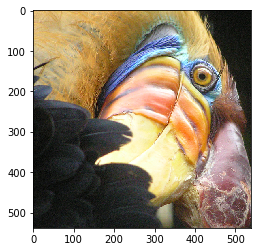

In [21]:
im1 = bgr2rgb(cv2.imread('bird_large.tiff'))
plt.imshow(im1)
plt.show()

In [22]:
k = 5
# k colors                
# low k make difference when we apply k-mean ++

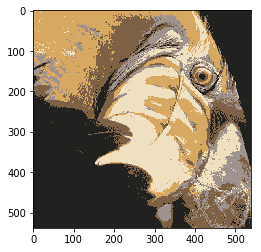

In [23]:
########        K_MEANS_PLUSPLUS      #########
photo = cv2.imread("bird_large.tiff")
origin_shape = photo.shape
photo = photo.reshape(-1,3) * 1.0
photo_k_mean_plus = k_mean(photo,k,plus=True)

###########################################################
#   in k_mean. i apply Vectorize(aspired by CS231n assignment 1)
#   , makes this faster! =)
###########################################################

photo_ok = photo_k_mean_plus.reshape(origin_shape)
k_photo = cv2.imwrite('after_k_plus.tiff',photo_ok)
im = bgr2rgb(cv2.imread('after_k_plus.tiff'))
plt.imshow(im)
plt.show()

#############################################################
#   I am generating K feature colors using K-mean++
#   To get longest distance feature.
#   You can check utils.py 
############################################################

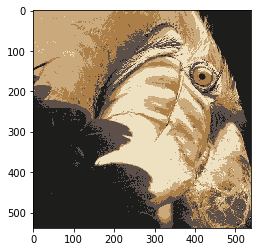

In [24]:
########        K_MEAN_CLASSIC      #########
photo = cv2.imread("bird_large.tiff")
origin_shape = photo.shape
photo = photo.reshape(-1,3) * 1.0
photo_k_mean = k_mean(photo,k,plus=False)
###########################################################
#   in k_mean. i apply Vectorize(aspired by CS231n assignment 1)
#   , makes this faster! =)
##########################################################

photo_ok2 = photo_k_mean.reshape(origin_shape)
k_photo = cv2.imwrite('after_k_classic.tiff',photo_ok2)
im = bgr2rgb(cv2.imread('after_k_classic.tiff'))
plt.imshow(im)
plt.show()
#############################################################
#   As shown, low k with random choices is not good, but 
#   k-mean++ is good to handle this situation---> it has 
#   blue around eyes.
############################################################